In [142]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from time import time
import math
path_data1 = '/Users/SY/Desktop/obic/data/'#'D:/DATA/OBIC/'
path_data2 = 'C:/Users/1234/DATA/'
data_go = fits.open(path_data1 + 'gosss_2mass_new.fits')

In [143]:
start_time = time()
f = data_go[1].data


In [144]:
spt = list(f['STv3'])


In [145]:
# 分类(肉眼分类)
# 写成函数
def divid(s):
    # s is a string
    if 'N' in s or 'C' in s:
        new_s = s[2:]
    else:
        new_s = s[1:]
    if ':' in new_s:
        new_s = new_s[:-1]
    if '-' in new_s:
        new_s = new_s[:-2]
    f_s = float(new_s)
    #print(f_s)
    return f_s
#    return round(f_s*2)/2 #round可能不可靠
#     return math.floor(f_s)

In [146]:
#math.floor(9.7)
for s in spt:
    f_s = divid(s)

In [147]:
#直接计算直方图的频数（算法有点粗暴）
new_spt = []
for s in spt:
    new_spt.append(divid(s))
    

figure_spt = np.array(new_spt) #散点
figure_spt_sort = np.sort(np.array([i for i in set(figure_spt)]))
count = []
for i in range(len(figure_spt_sort)):
    k = 0
    for ele in new_spt:
        if ele == figure_spt_sort[i]:
            k = k + 1
    count.append(k)
#print(count)
print(figure_spt_sort)

[ 2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.
  9.2  9.5  9.7]


In [148]:
#give color(JH) or else in 2MASS
color_JH = f['Jmag']-f['Hmag']
[ra,dec] = [f['RAd'],f['decd']]
print(np.min(color_JH))
color_JH = color_JH[:, np.newaxis]

ra = ra[:, np.newaxis]
dec = dec[:, np.newaxis]

figure_spt = figure_spt[:, np.newaxis]


ra_dec1=np.concatenate((ra,dec), axis = 1)
c_ra_dec1=np.concatenate((color_JH,ra_dec1), axis = 1)
c_ra_dec=np.concatenate((c_ra_dec1,figure_spt), axis = 1)


np.min(c_ra_dec1[:,0])

-2.827


-2.8270001411437988

In [149]:
#fit scatter

ic = []
ratio = 5
c_ra_dec_fin = np.array([0,0,0,0])
for i in range(len(figure_spt_sort)):
    bin = []
    for ele_num in range(len(spt)):
        if figure_spt[ele_num] == figure_spt_sort[i]:
            bin.append(c_ra_dec[ele_num,:])
    bin_ara = np.array(bin)
    #print(bin_c_ara)
    #select the fit dot
    ratio_integer = math.ceil(len(bin_ara[:,0])*ratio/100)
    sort = bin_ara[np.lexsort(bin_ara[:,::-1].T)] 
    #print(sort)
    #print(sort[:,0][:ratio_integer])
    a = np.median(sort[:,0][:ratio_integer])
    index = np.where(sort[:,0]<=np.max(sort[:,0][:ratio_integer]))
    #print(sort[index[0],:])
    c_ra_dec_final = sort[index[0],:]
    #print(c_ra_dec_final.shape)
    c_ra_dec_fin = np.vstack((c_ra_dec_fin,c_ra_dec_final))
    ic.append(float(a))
c_ra_dec_fin = c_ra_dec_fin[1:,:]
use_ic = np.array(ic)
use_spt = np.array(figure_spt_sort)
print(len(use_ic))
print(len(use_spt))
print(use_ic.shape)
print(use_spt)
print(c_ra_dec_fin.shape)

18
18
(18,)
[ 2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.
  9.2  9.5  9.7]
(38, 4)


In [150]:
whole_figure = np.vstack((use_spt , use_ic)).T
print(whole_figure)

[[  2.00000000e+00   9.00001526e-02]
 [  2.50000000e+00   2.90000439e-01]
 [  3.00000000e+00   1.00040436e-03]
 [  3.50000000e+00   2.99978256e-03]
 [  4.00000000e+00  -1.64999962e-01]
 [  4.50000000e+00  -7.00044632e-03]
 [  5.00000000e+00  -4.10003662e-02]
 [  5.50000000e+00  -8.19997787e-02]
 [  6.00000000e+00  -5.35001755e-02]
 [  6.50000000e+00  -7.60002136e-02]
 [  7.00000000e+00  -1.05499983e-01]
 [  7.50000000e+00  -8.30001831e-02]
 [  8.00000000e+00  -7.20000267e-02]
 [  8.50000000e+00  -1.08000278e-01]
 [  9.00000000e+00  -1.37000084e-01]
 [  9.20000000e+00  -1.49999857e-01]
 [  9.50000000e+00  -1.53999805e-01]
 [  9.70000000e+00  -1.09500170e-01]]


In [151]:
# SFD ratio

ratio_SFD = 5

# fitting curve


fc = np.polyfit(use_spt, use_ic, 3)#用3次多项式拟合
fitcurve = np.poly1d(fc)
# print(fitcurve) #在屏幕上打印拟合多项式

colorvals=fitcurve(use_spt)

# print(len(colorvals),len(int_teff))
#print(len(bin_tbl_final[teff].values))

# SFD_tbl_ratio[teff]

In [152]:
from __future__ import print_function
import numpy as np
import pandas as pd

from astropy.coordinates import SkyCoord
from dustmaps.sfd import SFDQuery

sfd = SFDQuery()

Consts = pd.DataFrame({'J':np.array([0.709]),\
'H':np.array([0.449]),\
'g':np.array([3.303]),\
'r':np.array([2.285]),\
'i':np.array([1.698])})
# Const1 = 0.709 #J #3.303 #g #2.285 #r
# Const2 = 0.449 #H #2.285 #r #1.698 #i

def SFD_IC(Catalog_raw,color1,color2):
    # Using ebv from SFD to get the intrinsic color

    Intrinsic_color = []

    for i in range(len(Catalog_raw)):
        coords = SkyCoord(Catalog_raw[i,1],Catalog_raw[i,2],frame = 'icrs',unit = 'deg')
        ebv = sfd(coords)
        A_c1 = Consts[color1].values*ebv
        A_c2 = Consts[color2].values*ebv

        Intrinsic_color.append(Catalog_raw[i,0] - A_c1 + A_c2)
    Intrinsic_color = np.array(Intrinsic_color)
    return Intrinsic_color
SFD_catalog_color = SFD_IC(c_ra_dec_fin,'J','H').reshape(-1,1)
SFD_catalog_teff = c_ra_dec_fin[:,3].reshape(-1,1)

whole_sfd = np.hstack((SFD_catalog_teff , SFD_catalog_color))


mean = []
for i in range(len(figure_spt_sort)):
    sfd_bin = []
    for ele_num in range(len(whole_sfd[:,0])):
        if whole_sfd[ele_num,0] == figure_spt_sort[i]:
            sfd_bin.append(whole_sfd[ele_num,1])
    mean.append(np.mean(sfd_bin))
print(mean)

[-6.4628272247314431, -3.1234712982177726, -0.20392698287963862, -3.1625354766845692, -0.40365513086318966, -4.1998847770690908, -1.0525642919540406, -14.825891380310058, -2.0852397012710564, -1.589919951856136, -4.8075479805469508, -0.2163309472799301, -0.31757805436849584, -0.29037360649555916, -0.2963111400604248, -0.24740660250186919, -0.2047112537547946, -1.5081867651939391]


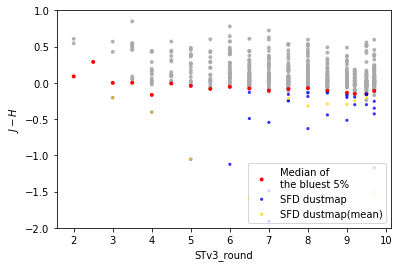

In [155]:
plt.scatter(figure_spt,color_JH ,c='darkgrey', s=15, edgecolors='None', alpha=0.9)
plt.scatter(use_spt,use_ic, c='r', edgecolors='None', s=15,label='Median of\nthe bluest 5%')
plt.scatter(SFD_catalog_teff,SFD_catalog_color,alpha=0.8,edgecolors='None',c='b',s=10,label='SFD dustmap',zorder=2)
plt.scatter(figure_spt_sort,mean,alpha=0.8,edgecolors='None',c='gold',s=10,label='SFD dustmap(mean)',zorder=2)
plt.xlabel('STv3_round') ; plt.ylabel('$J-H$')
plt.ylim(-2,1.0)
plt.legend(loc='lower right')
plt.savefig(path_data1+'pictures/'+'2018_5_3_GOSSS.png', dpi=200)
plt.show()

In [78]:
a=np.array([1,2,3])
b=np.array([1,2,4])
a = a[:, np.newaxis]
b = b[:, np.newaxis]
v=np.concatenate((a.T,b.T), axis = 0)
v

array([[1, 2, 3],
       [1, 2, 4]])